# Assignment 3

## 1A. Factor Premiums and Factor Decay

In [46]:
import pandas as pd
import numpy as np

# Read the monthly data CSV into a DataFrame and print the first and last few rows
df_factors = pd.read_csv('F-F_Research_Data_Factors.CSV', skiprows=4, nrows=1178, header=None, names=['Date', 'Mkt-RF', 'SMB', 'HML', 'RF'])

# Display the head and tail of the DataFrame
print(df_factors.head())
print(df_factors.tail())

     Date  Mkt-RF   SMB   HML    RF
0  192607    2.96 -2.56 -2.43  0.22
1  192608    2.64 -1.17  3.82  0.25
2  192609    0.36 -1.40  0.13  0.23
3  192610   -3.24 -0.09  0.70  0.32
4  192611    2.53 -0.10 -0.51  0.31
        Date  Mkt-RF   SMB   HML    RF
1173  202404   -4.67 -2.39 -0.52  0.47
1174  202405    4.34  0.78 -1.66  0.44
1175  202406    2.77 -3.06 -3.31  0.41
1176  202407    1.24  6.80  5.73  0.45
1177  202408    1.61 -3.55 -1.12  0.48


In [47]:
# Change the Date column to a datetime object and set it as the index
df_factors["Date"] = pd.to_datetime(df_factors["Date"], format='%Y%m')
df_factors.set_index("Date", inplace=True)

# Add a column for the market returns
df_factors['Mkt'] = df_factors['Mkt-RF'] + df_factors['RF']

# Print the first few rows of the modified DataFrame
df_factors.head()

,Mkt-RF,SMB,HML,RF,Mkt
Date,,,,,
1926-07-01,2.96,-2.56,-2.43,0.22,3.18
1926-08-01,2.64,-1.17,3.82,0.25,2.89
1926-09-01,0.36,-1.40,0.13,0.23,0.59
1926-10-01,-3.24,-0.09,0.70,0.32,-2.92
1926-11-01,2.53,-0.10,-0.51,0.31,2.84


In [48]:
# Filter the dataframe for the two time periods
df_1927_1992 = df_factors.loc['1927-01':'1992-12']
df_1993_2023 = df_factors.loc['1993-01':'2023-12']

factors = ['Mkt', 'SMB', 'Mkt-RF']

def t_stat(df, factors):
    t_stats_am = {}
    t_stats_gm = {}
    len_df = len(df)
    # t_stat = (mean - population_mean) / (std / sqrt(n))
    for factor in factors:
        # Calculate the t_stats from mean ( how to calculate populated mean ?) and standard deviation
        temp = df[factor]/100
        std_df = np.std(temp)
        se = std_df/np.sqrt(len_df)
        # https://www.investopedia.com/ask/answers/06/geometricmean.asp
        t_stats_am[factor] = np.mean(temp)/se
        t_stats_gm[factor] = (np.prod(1 + temp)**(1/len_df) - 1)/se
    return t_stats_am, t_stats_gm

# Calculate the t-statistic
t_stat_1927_1992_am, t_stat_1927_1992_gm = t_stat(df_1927_1992, factors)
t_stat_1993_2023_am, t_stat_1993_2023_gm = t_stat(df_1993_2023, factors)

print("T-Stats for 1927-1992")
print('\nWith Arithmetic Mean')
for key, value in t_stat_1927_1992_am.items():
    print(f'{key}: {value}')
    
print('\nWith Geometric Mean')
for key, value in t_stat_1927_1992_gm.items():
    print(f'{key}: {value}')
    
print("\nT-Stats for 1993-2023")
print('\nWith Arithmetic Mean')
for key, value in t_stat_1993_2023_am.items():
    print(f'{key}: {value}')

print('\nWith Geometric Mean')
for key, value in t_stat_1993_2023_gm.items():
    print(f'{key}: {value}')
    
# https://www.investopedia.com/ask/answers/06/geometricmean.asp
print('\n Geometric mean is preferred over arithmetic mean as the data is correlated. \n')
    
    
print("The t-statistic for the 1927-1992 period is higher than the 1993-2023 period for all factors. This indicates that the 1927-1992 period had a higher level of significance in the factors than the 1993-2023 period.")

T-Stats for 1927-1992

With Arithmetic Mean
Mkt: 4.726132030772343
SMB: 2.1271515550073685
Mkt-RF: 3.2205625120989674

With Geometric Mean
Mkt: 3.926331796022473
SMB: 1.6993284993005768
Mkt-RF: 2.417559767205432

T-Stats for 1993-2023

With Arithmetic Mean
Mkt: 3.9249363455201687
SMB: 0.5355493777235056
Mkt-RF: 3.09945603152893

With Geometric Mean
Mkt: 3.4898392344986062
SMB: 0.23145185441694066
Mkt-RF: 2.6632732610065117

 Geometric mean is preferred over arithmetic mean as the data is correlated. 

The t-statistic for the 1927-1992 period is higher than the 1993-2023 period for all factors. This indicates that the 1927-1992 period had a higher level of significance in the factors than the 1993-2023 period.


In [49]:
# Read the monthly data CSV into a DataFrame and print the first few rows
df_returns_beta = pd.read_csv('Portfolios_Formed_on_BETA.csv', skiprows=16, nrows=734, header=None, names=['Date', 'Lo 20', 'Qnt 2', 'Qnt 3', 'Qnt 4', 'Hi 20', 'Lo 10', 'Dec 2', 'Dec 3', 'Dec 4','Dec 5', 'Dec 6', 'Dec 7', 'Dec 8','Dec 9','Hi 10'])

df_returns_beta.head()

,Date,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
0,196307,1.14,-0.10,-0.93,-0.91,-1.46,1.36,0.75,0.08,-0.28,-0.59,-1.22,-0.42,-1.35,-2.06,-0.77
1,196308,3.66,4.77,6.34,6.38,9.72,3.52,3.90,4.29,5.26,5.20,7.34,7.94,4.96,9.06,10.47
2,196309,-2.78,-0.76,-0.71,-0.92,-2.74,-3.10,-2.24,-0.54,-0.98,-1.33,-0.17,-0.81,-1.02,-1.91,-3.68
3,196310,0.74,3.57,2.08,5.75,3.05,1.24,-0.13,2.00,5.13,2.35,1.86,6.80,4.76,3.09,3.01
4,196311,-0.63,-0.24,-0.91,-0.83,0.18,-0.91,-0.15,1.60,-2.03,-1.00,-0.84,-1.14,-0.54,-0.12,0.52


In [50]:
# Change the Date column to a datetime object and set it as the index
df_returns_beta["Date"] = pd.to_datetime(df_returns_beta["Date"], format='%Y%m')
df_returns_beta.set_index("Date", inplace=True)

df_returns_beta = df_returns_beta.loc[:, ['Lo 10', 'Hi 10']]
df_beta_momentum = df_returns_beta['Hi 10'] - df_returns_beta['Lo 10']

df_beta_momentum.head()


Date
1963-07-01   -2.13
1963-08-01    6.95
1963-09-01   -0.58
1963-10-01    1.77
1963-11-01    1.43
dtype: float64

In [51]:
df_momentum = pd.read_csv('F-F_Momentum_Factor.CSV', skiprows=14, nrows=1172, header=None, names=['Date', 'Momentum'])
df_momentum["Date"] = pd.to_datetime(df_momentum["Date"], format='%Y%m')
df_momentum.set_index("Date", inplace=True)


## 1B. Factor Index Construction in Practice

## 2A. Data cleaning and validation

In [52]:
df_stocks_date = pd.read_excel('data_ml.xlsx' , usecols=['stock_id', 'date', 'R1M_Usd', 'R3M_Usd', 'R6M_Usd', 'R12M_Usd'], parse_dates=['date'])       # Load the data

date_counts = df_stocks_date['date'].value_counts()


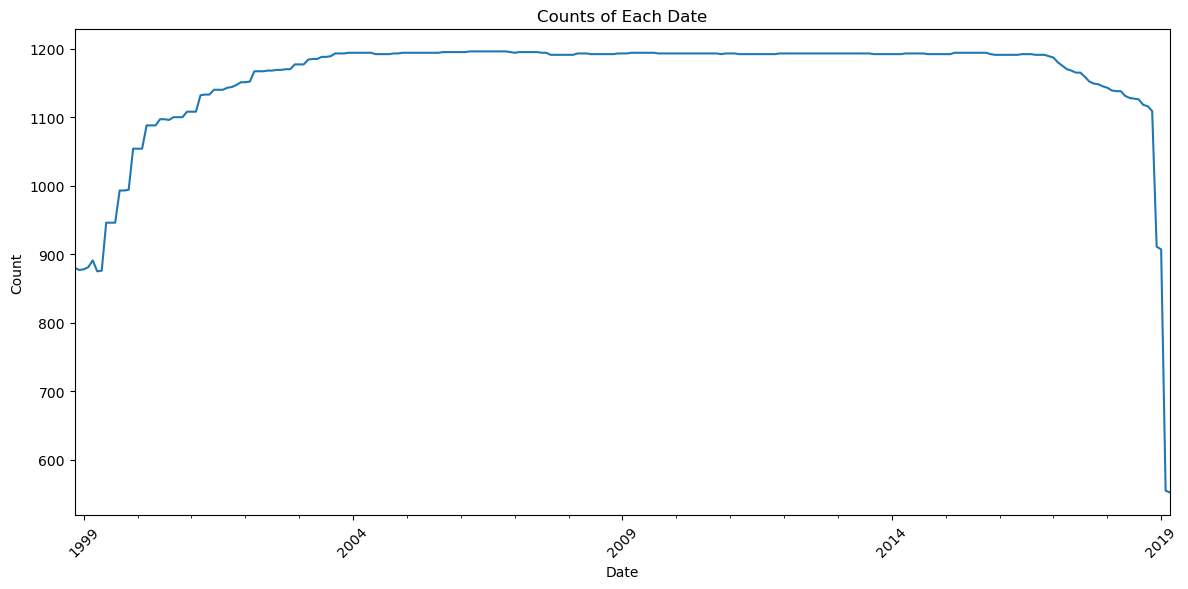

In [53]:
import matplotlib.pyplot as plt

date_counts = date_counts.sort_index()

# Plot the counts
plt.figure(figsize=(12, 6))
date_counts.plot()
plt.title('Counts of Each Date')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

count    283380.000000
mean          0.012633
std           0.177877
min          -0.922000
25%          -0.044000
50%           0.011000
75%           0.064000
max          30.176000
Name: R1M_Usd, dtype: float64


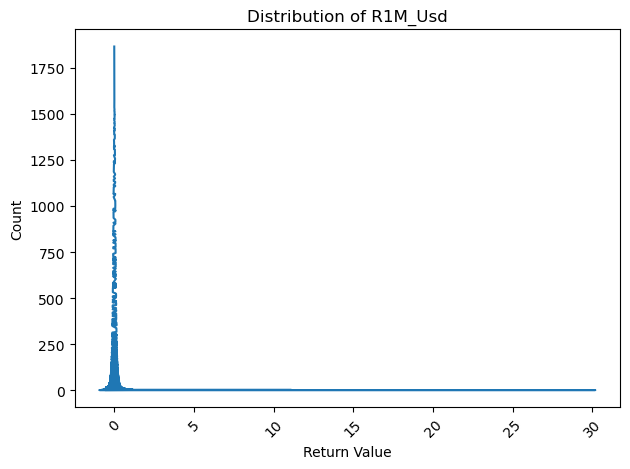

In [59]:
# Calculate basic statistics
basic_stats = df_stocks_date['R1M_Usd'].describe()

# Display the basic statistics
print(basic_stats)

R1M_counts = df_stocks_date['R1M_Usd'].value_counts()

plt.figure()
R1M_counts.plot()
plt.title('Distribution of R1M_Usd')
plt.xlabel('Return Value')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Calculate basic statistics
basic_stats = df_stocks_date['R3M_Usd'].describe()

# Display the basic statistics
print(basic_stats)

R1M_counts = df_stocks_date['R3M_Usd'].value_counts()

plt.figure()
R1M_counts.plot()
plt.title('Distribution of R3M_Usd')
plt.xlabel('Return Value')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Calculate basic statistics
basic_stats = df_stocks_date['R6M_Usd'].describe()

# Display the basic statistics
print(basic_stats)

R1M_counts = df_stocks_date['R6M_Usd'].value_counts()

plt.figure()
R1M_counts.plot()
plt.title('Distribution of R6M_Usd')
plt.xlabel('Return Value')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Calculate basic statistics
basic_stats = df_stocks_date['R12M_Usd'].describe()

# Display the basic statistics
print(basic_stats)

R1M_counts = df_stocks_date['R12M_Usd'].value_counts()

plt.figure()
R1M_counts.plot()
plt.title('Distribution of R12M_Usd')
plt.xlabel('Return Value')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()